In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('cleaned_movies.csv')

Simple Resampling - Random Oversampling

In [3]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns=['genres', 'original_language', 'popularity_class', 'popularity']).copy()
y = df['popularity_class']

# should we add differt binding for oversampling?
# in this type of resampling we need numeric feature I added the mean value, but maybe for different algorithm juz adding nr index instead of fore example genres will be better?

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.concat([X_resampled.reset_index(drop=True),
                          pd.Series(y_resampled, name='popularity_class')], axis=1)

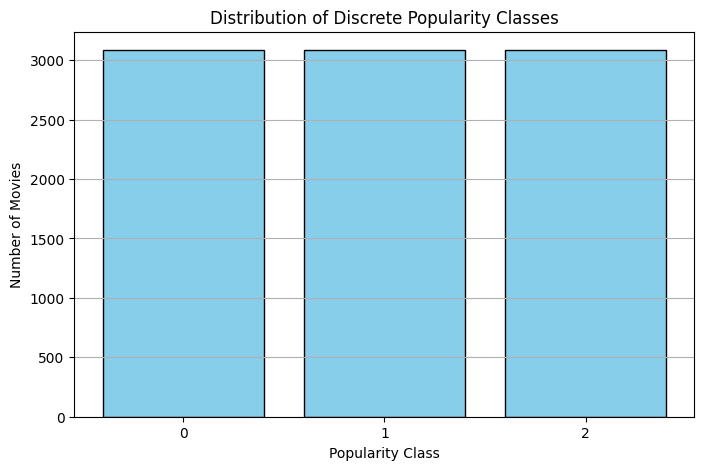

In [6]:
import matplotlib.pyplot as plt

class_counts = df_resampled['popularity_class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Discrete Popularity Classes')
plt.xlabel('Popularity Class')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.savefig('histogram_popularity_simply_resampling_discrete.png')
plt.show()  

SVM

In [7]:
X = df_resampled.drop(columns=['popularity_class']).copy()
y = df_resampled['popularity_class']

print(X.dtypes)

budget              int64
runtime           float64
vote_average      float64
vote_count          int64
revenue             int64
release_year        int64
genres_score      float64
language_score    float64
dtype: object


In [8]:
from sklearn.svm import SVC  # if the import is needed only in one cell should we put it here or on the top? 

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# 5-fold cross-validation (for accuracy score)
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("R² score for each fold:", scores)
print("Mean R² score:", scores.mean())

# we have to adjust metrics

R² score for each fold: [0.74230146 0.89303079 0.87628309 0.90707726 0.90653701]
Mean R² score: 0.8650459211237169


KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("R² score for each fold:", scores)
print("Mean R² score:", scores.mean())
# we have to adjust metrics

R² score for each fold: [0.76985413 0.89735278 0.89519179 0.92004322 0.93084819]
Mean R² score: 0.8826580226904376
